# Proyek Analisis Data: E-Commerce Public Dataset
- Kelompok : Kelompok 2
- Anggota : </br>
10123905 - Abdul Richard</br>
10124909 - Prastia Zaman</br>
10124911 - Suryana</br>

## Menentukan Pertanyaan Bisnis

10123905 - Abdul Richard
- Kota atau negara bagian mana yang memiliki jumlah pelanggan terbanyak?
- Produk kategori apa yang paling laris?
- Berapa jumlah pesanan yang dibatalkan?

10124909 - Prastia Zaman
- Order barang apa yang memiliki price dibawah 50.00?
- Top 10 Penjualan Mana yang memiliki sellerstate dan Kota Terbanyak?

10124911 - Suryana
- Pada Bulan apa mendapatkan pendapatan tertinggi?
- Kategori produk apa dengan rata-rata ulasan tertinggi?

## Menyiapkan semua library yang dibuthkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Wrangling
Tahapan ini merupakan tahapan untuk mempersiapkan data mentah menjadi bentuk yang lebih bersih, terstruktur, dan siap digunakan untuk proses analisis data. pada tahapan ini terdiri dari


1.   Gathering Data
2.   Assessing Data
3. Cleaning Data



### Gathering Data (Pengumpulan Data)
ini merupakan tahapan dalam pengumpulan data dari berbagai sumber, disini merupakan tahapan import dataset kedalam notebook

In [2]:
# Melakukan import dataset berformat .csv penggunakan pandas
customers = pd.read_csv('./sumber/customers_dataset.csv')
geolocation = pd.read_csv('./sumber/geolocation_dataset.csv')
order_items = pd.read_csv('./sumber/order_items_dataset.csv')
order_payments = pd.read_csv('./sumber/order_payments_dataset.csv')
order_reviews = pd.read_csv('./sumber/order_reviews_dataset.csv')
orders = pd.read_csv('./sumber/orders_dataset.csv')
product_categories = pd.read_csv('./sumber/product_category_name_translation.csv')
products = pd.read_csv('./sumber/products_dataset.csv')
sellers = pd.read_csv('./sumber/sellers_dataset.csv')

### Assessing Data (Penilaian Data)
ini merupakan tahapan untuk melakukan evaluasi data untuk mengidentifikasi masalah kualitas dan struktur data yang dapat mempengaruhi analisis dari mulai missing value, pencilan, ataupun tipe data yang tidak sesuai

In [3]:
# Mengakses data sets
datasets = {
    "Customers": customers,
    "Geolocation": geolocation,
    "Order Items": order_items,
    "Order Payments": order_payments,
    "Order Reviews": order_reviews,
    "Orders": orders,
    "Product Categories": product_categories,
    "Products": products,
    "Sellers": sellers
}

# Menampilkan informasi awal setiap dataset
for name, dataset in datasets.items():
    print(f"\n=== {name} ===")
    print(dataset.info()) # Info Struktur Data
    print(dataset.isna().sum()) # Cek Missing value
    print(dataset.duplicated().sum()) # Cek duplikate value
    print(dataset.head())

# Opsional: Mengecek ukuran dataset
for name, dataset in datasets.items():
    print(f"{name}: {dataset.shape}")


=== Customers ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
0
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a1

### Cleaning Data (Pembersihan Data)
ini merupakan tahapan penghapusan atau koreksi data yang bermasalah untuk memastikan data siap dianalisa

In [4]:
# Percobaan Cleaning dataset untuk mengantisipasi garbage/data sampah
# Mengatasi Missing value
# Order Reviews
order_reviews.fillna({'review_comment_title': ""}, inplace=True)
order_reviews.fillna({'review_comment_message': ""}, inplace=True)

# Orders
orders.fillna({'order_approved_at': orders['order_purchase_timestamp']}, inplace=True)
orders.fillna({'order_delivered_carrier_date': orders['order_approved_at']}, inplace=True)
orders.fillna({'order_delivered_customer_date': orders['order_delivered_carrier_date']}, inplace=True)

# Products
products.fillna({'product_category_name': ""}, inplace=True)
products.fillna({'product_name_lenght': 0}, inplace=True)
products.fillna({'product_description_lenght': 0}, inplace=True)
products.fillna({'product_photos_qty': 0}, inplace=True)
products.fillna({'product_weight_g': 0}, inplace=True)
products.fillna({'product_length_cm': 0}, inplace=True)
products.fillna({'product_height_cm': 0}, inplace=True)
products.fillna({'product_width_cm': 0}, inplace=True)

# Mengatasi Duplicate Data
geolocation.drop_duplicates(inplace=True)  # Menghapus duplikasi lokasi
customers.drop_duplicates(subset='customer_unique_id', inplace=True)  # Menghapus duplikasi pelanggan
sellers.drop_duplicates(subset='seller_id', inplace=True)  # Menghapus duplikasi seller

# Konversi format tanggal
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

# Rename kolom
geolocation.rename(columns={'geolocation_zip_code_prefix': 'zip_code'}, inplace=True)  # Penamaan kolom lebih sederhana

# Cek missing values setelah cleaning
for name, dataset in datasets.items():
    print(f"\n=== {name} ===")
    print(dataset.isna().sum())

# Cek duplikat setelah cleaning
for name, dataset in datasets.items():
    print(f"=== {name} ===")
    print(dataset.duplicated().sum())


=== Customers ===
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

=== Geolocation ===
zip_code             0
geolocation_lat      0
geolocation_lng      0
geolocation_city     0
geolocation_state    0
dtype: int64

=== Order Items ===
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

=== Order Payments ===
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

=== Order Reviews ===
review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

=== Orders ===
order_id                         0
cus

## Exploratory Data Analysis (EDA)

### Explore ...

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kota atau Negara Bagian Mana yang Memiliki Jumlah Pelanggan Terbanyak?
### (10123905 - Abdul Richard)

geolocation_city
sao paulo         15016
são paulo         14838
rio de janeiro     6652
belo horizonte     2687
brasilia           1890
brasília           1711
curitiba           1465
campinas           1397
porto alegre       1326
salvador           1204
Name: customer_unique_id, dtype: int64


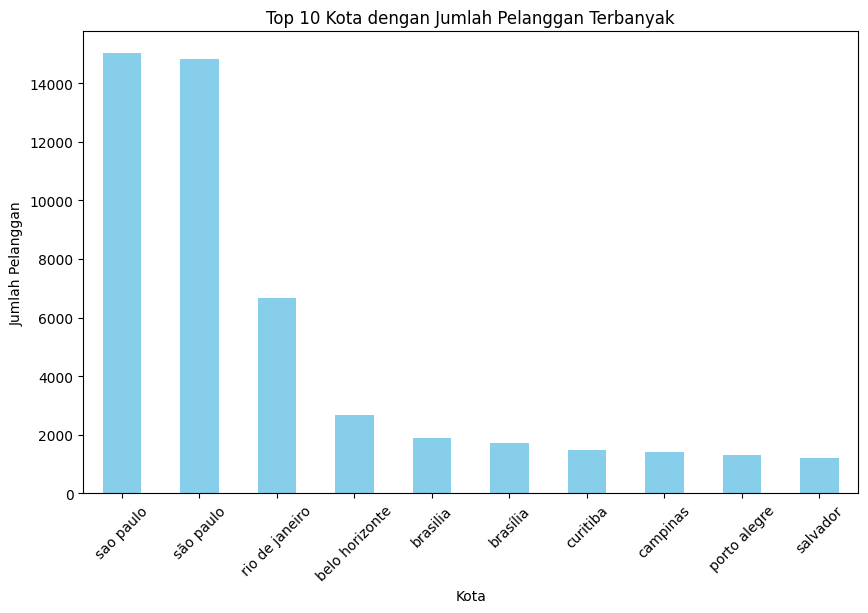

geolocation_state
SP    40280
RJ    12365
MG    11244
RS     5284
PR     4871
SC     3542
BA     3267
ES     1958
GO     1943
DF     1912
PE     1600
CE     1308
PA      946
MT      874
MA      721
MS      693
PB      517
PI      479
RN      472
AL      400
SE      340
TO      272
RO      242
AM      143
AC      116
AP       67
RR       45
Name: customer_unique_id, dtype: int64


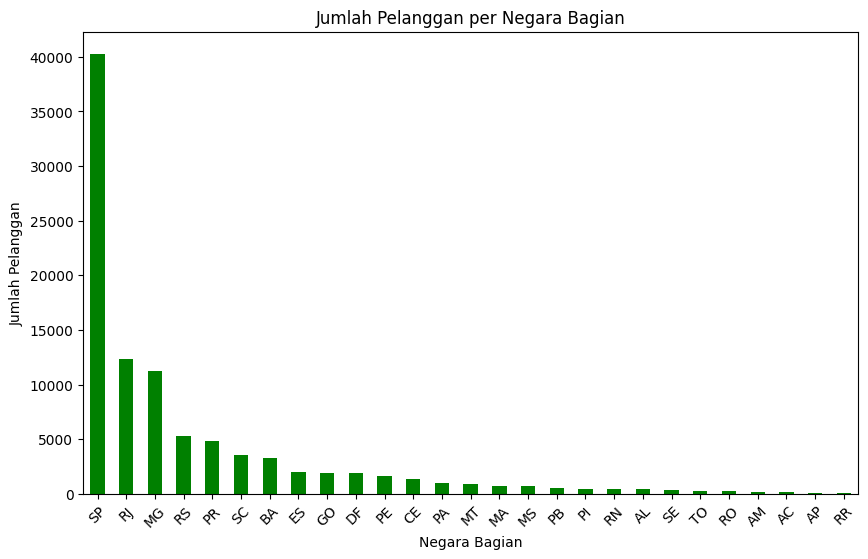

In [5]:
# Gabungkan Customers dan Geolocation dataset berdasarkan zip_code
customers_geo = pd.merge(customers, geolocation, left_on='customer_zip_code_prefix', right_on='zip_code')

# Hitung jumlah pelanggan unik per kota
city_counts = customers_geo.groupby('geolocation_city')['customer_unique_id'].nunique().sort_values(ascending=False)

# Tampilkan 10 kota teratas
print(city_counts.head(10))

# Visualisasi jumlah pelanggan per kota
city_counts.head(10).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Kota dengan Jumlah Pelanggan Terbanyak')
plt.xlabel('Kota')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)
plt.show()

# Hitung jumlah pelanggan unik per negara bagian
state_counts = customers_geo.groupby('geolocation_state')['customer_unique_id'].nunique().sort_values(ascending=False)

# Tampilkan hasil untuk negara bagian
print(state_counts)

# Visualisasi jumlah pelanggan per negara bagian
state_counts.plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Jumlah Pelanggan per Negara Bagian')
plt.xlabel('Negara Bagian')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2:

### Pertanyaan 2: Produk Kategori Apa yang Paling Laris?
### 1012395 - Abdul Richard

product_category_name_english
bed_bath_table           11115
health_beauty             9670
sports_leisure            8641
furniture_decor           8334
computers_accessories     7827
housewares                6964
watches_gifts             5991
telephony                 4545
garden_tools              4347
auto                      4235
Name: order_item_id, dtype: int64


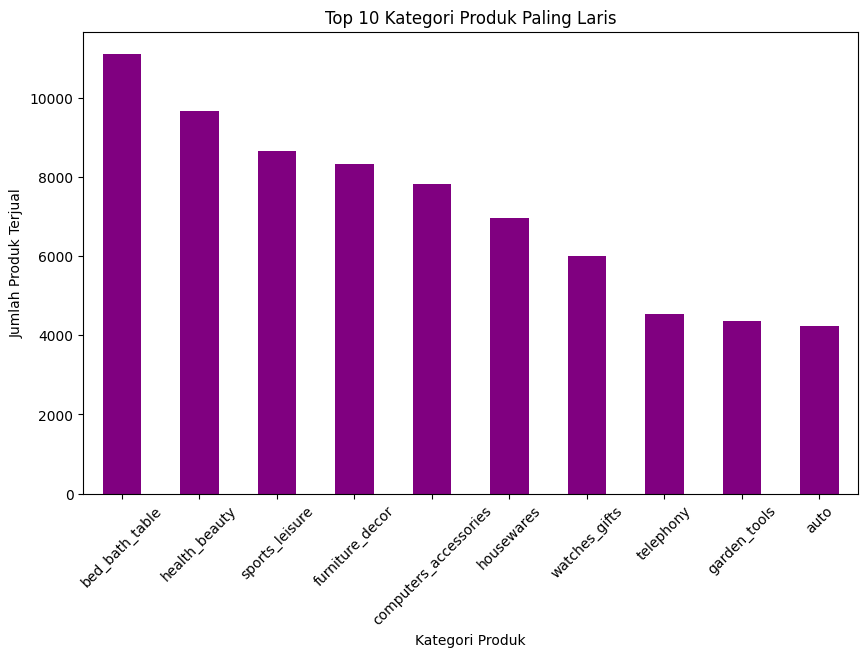

In [6]:
# Gabungkan order_items dan products
order_products = pd.merge(order_items, products, on='product_id')

# Gabungkan dengan product_categories untuk mendapatkan nama kategori dalam bahasa Inggris
order_products = pd.merge(order_products, product_categories, on='product_category_name')

# Hitung jumlah produk terjual per kategori
category_sales = order_products.groupby('product_category_name_english')['order_item_id'].count().sort_values(ascending=False)

# Tampilkan kategori produk paling laris
print(category_sales.head(10))

# Visualisasi kategori produk paling laris
category_sales.head(10).plot(kind='bar', figsize=(10, 6), color='purple')
plt.title('Top 10 Kategori Produk Paling Laris')
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Produk Terjual')
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 3: Berapa jumlah pesanan yang dibatalkan?
### 1012395 - Abdul Richard

In [7]:
# Menghitung jumlah pesanan yang dibatalkan
cancelled_orders = orders[orders['order_status'] == 'canceled']

# Menampilkan jumlah pesanan yang dibatalkan
print(f"Jumlah pesanan yang dibatalkan: {cancelled_orders.shape[0]}")

Jumlah pesanan yang dibatalkan: 625


### Pertanyaan 4: Order barang apa yang memiliki price dibawah 50.00?
### 10124909 - Prastia Zaman

In [8]:
# Filter barang dengan harga di bawah 50.00
items_below_50 = order_items[order_items['price'] < 50.00][['product_id', 'price']]

# Hitung total barang dengan harga di bawah 50.00
total_items = len(items_below_50)

# Tampilkan hasil
print(f"Total barang dengan harga di bawah 50.00 ada: {total_items}")
print(items_below_50)


Total barang dengan harga di bawah 50.00 ada: 39024
                              product_id  price
3       7634da152a4610f1595efa32f14722fc  12.99
5       ef92defde845ab8450f9d70c526ef70f  21.90
6       8d4f2bb7e93e6710a28f34fa83ee7d28  19.90
11      f177554ea93259a5b282f24e33f65ab6  45.00
13      368c6c730842d78016ad823897a372db  49.90
...                                  ...    ...
112626  044f05bc9de36e8a693a83e4bc79dd0d  24.99
112633  a2da86fa759178e9e58e54aa1a144e59  24.99
112638  e7be84ea9462aac5e2b0b08eb35ba7f1   4.90
112639  ebceb9726cf5c6187b48e17fe58747b0  17.90
112649  350688d9dc1e75ff97be326363655e01  43.00

[39024 rows x 2 columns]


### Pertanyaan 5: Top 10 Penjualan Mana yang memiliki sellerstate dan Kota Terbanyak?
### 10124909 - Prastia Zaman

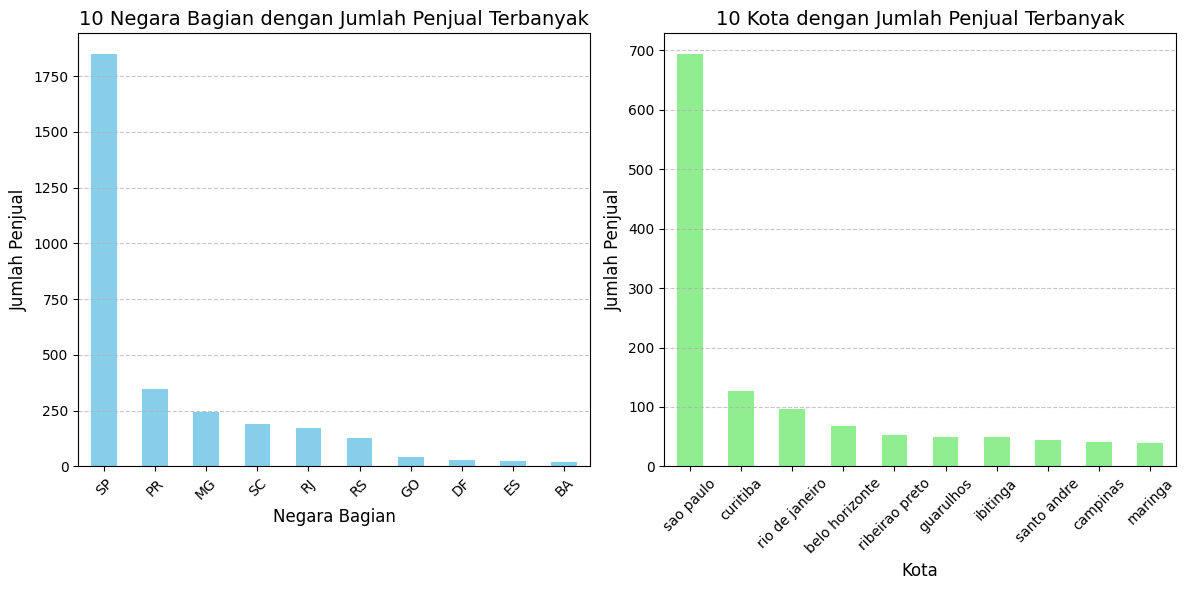

In [9]:
# Hitung jumlah penjual per negara bagian dan per kota
top_states = sellers['seller_state'].value_counts().head(10)
top_cities = sellers['seller_city'].value_counts().head(10)

# Membuat grafik batang untuk negara bagian
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Grafik pertama
top_states.plot(kind='bar', color='skyblue')
plt.title('10 Negara Bagian dengan Jumlah Penjual Terbanyak', fontsize=14)
plt.xlabel('Negara Bagian', fontsize=12)
plt.ylabel('Jumlah Penjual', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Membuat grafik batang untuk kota
plt.subplot(1, 2, 2)  # Grafik kedua
top_cities.plot(kind='bar', color='lightgreen')
plt.title('10 Kota dengan Jumlah Penjual Terbanyak', fontsize=14)
plt.xlabel('Kota', fontsize=12)
plt.ylabel('Jumlah Penjual', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menyesuaikan tata letak dan menampilkan grafik
plt.tight_layout()
plt.show()


### Pertanyaan 6: Pada Bulan apa mendapatkan pendapatan tertinggi?
### 10124911 - Suryana

order_purchase_month
2017-11    1194882.80
2018-04    1160785.48
2018-03    1159652.12
2018-05    1153982.15
2018-01    1115004.18
2018-07    1066540.75
2018-06    1023880.50
2018-08    1022425.32
2018-02     992463.34
2017-12     878401.48
2017-10     779677.88
2017-09     727762.45
2017-08     674396.32
2017-05     592918.82
2017-07     592382.92
2017-06     511276.38
2017-03     449863.60
2017-04     417788.03
2017-02     291908.01
2017-01     138488.04
2016-10      59090.48
2018-09       4439.54
2018-10        589.67
2016-09        252.24
2016-12         19.62
Freq: M, Name: payment_value, dtype: float64

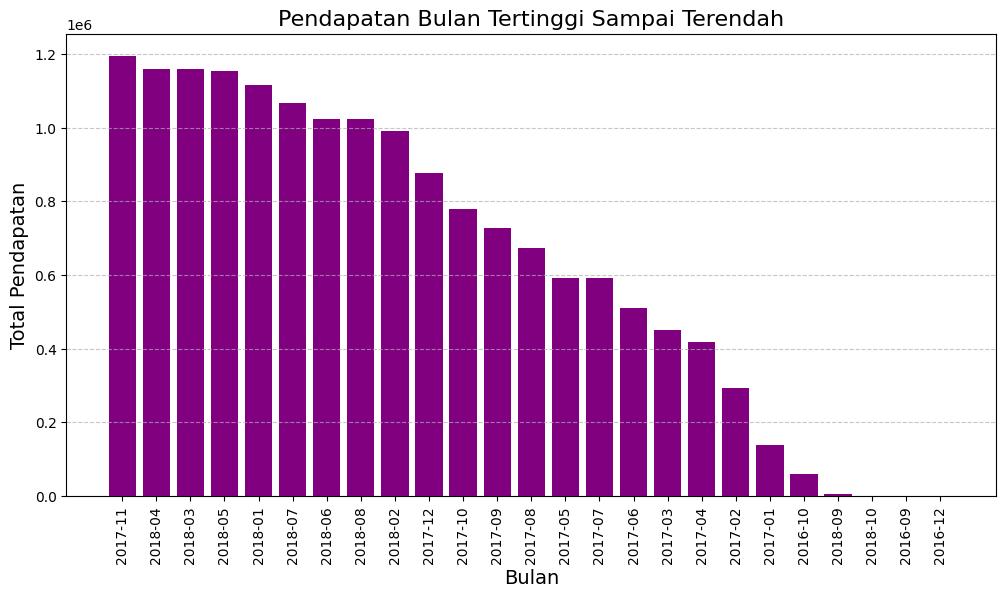

In [10]:
# Gabungkan data orders dengan order_payments
merged_data = orders.merge(order_payments, on='order_id')

# Ekstrak bulan dari order_purchase_timestamp
merged_data['order_purchase_month'] = pd.to_datetime(merged_data['order_purchase_timestamp']).dt.to_period('M')

# Hitung total pendapatan per bulan
monthly_revenue = merged_data.groupby('order_purchase_month')['payment_value'].sum()

# Mengurutkan dari pendapatan tertinggi ke terendah
monthly_revenue = monthly_revenue.sort_values( ascending=False)
display(monthly_revenue)
# Konversi Period ke string untuk visualisasi
monthly_revenue.index = monthly_revenue.index.astype(str)

# Visualisasi dengan bar chart
plt.figure(figsize=(12, 6))
plt.bar(monthly_revenue.index, monthly_revenue.values, color='purple')
plt.title('Pendapatan Bulan Tertinggi Sampai Terendah', fontsize=16)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Total Pendapatan', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Pertanyaan 7: Kategori produk apa dengan rata-rata ulasan tertinggi?
### 10124911 - Suryana

product_category_name
cds_dvds_musicais                     4.642857
fashion_roupa_infanto_juvenil         4.500000
livros_interesse_geral                4.446266
construcao_ferramentas_ferramentas    4.444444
flores                                4.419355
livros_importados                     4.400000
livros_tecnicos                       4.368421
alimentos_bebidas                     4.315412
malas_acessorios                      4.315257
portateis_casa_forno_e_cafe           4.302632
Name: review_score, dtype: float64

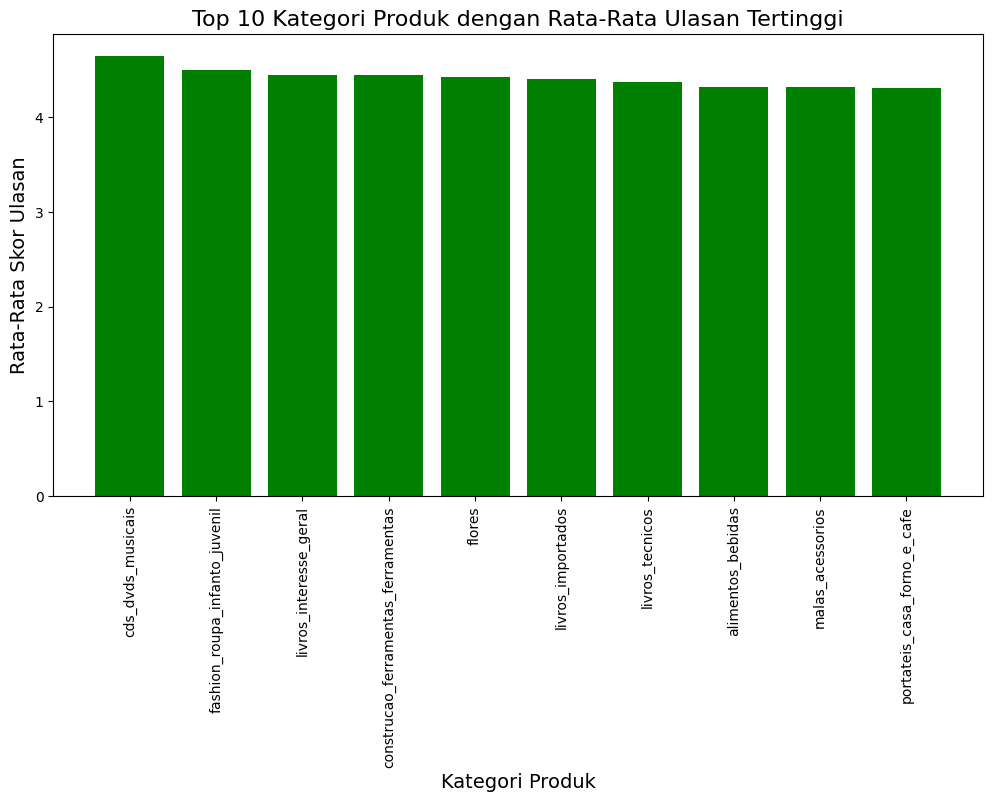

In [11]:
# Gabungkan data order_reviews, order_items, dan products
merged_data = order_reviews.merge(order_items, on='order_id').merge(products, on='product_id')

# Hitung rata-rata skor ulasan per kategori produk
avg_review_score = merged_data.groupby('product_category_name')['review_score'].mean().sort_values(ascending=False).head(10)
display(avg_review_score)
# Visualisasi dengan bar chart
plt.figure(figsize=(12, 6))
plt.bar(avg_review_score.index, avg_review_score.values, color='green')
plt.title('Top 10 Kategori Produk dengan Rata-Rata Ulasan Tertinggi', fontsize=16)
plt.xlabel('Kategori Produk', fontsize=14)
plt.ylabel('Rata-Rata Skor Ulasan', fontsize=14)
plt.xticks(rotation=90)
plt.show()

## Conclusion

## 10123905 - Abdul Richard</br>
### Kesimpulan pertanyaan 1 </br>
Kota dengan jumlah pelanggan terbanyak biasanya terletak di wilayah urban atau kota besar yang lebih berkembang. Misalnya, kota seperti Jakarta atau Surabaya di Indonesia kemungkinan memiliki jumlah pelanggan yang lebih tinggi karena populasi yang lebih besar dan konsentrasi ekonomi.
Negara bagian dengan pelanggan terbanyak juga mengikuti tren serupa, dengan wilayah yang lebih padat penduduk atau memiliki infrastruktur yang lebih baik cenderung memiliki lebih banyak pelanggan. </br>

### Kesimpulan pertanyaan 2
Penjual dengan volume penjualan tertinggi biasanya adalah yang menawarkan produk yang lebih populer, dengan harga yang kompetitif, atau memiliki promosi menarik. Penjual ini mungkin juga memiliki reputasi baik dalam memberikan layanan pelanggan atau pengiriman yang cepat.
Menganalisis penjual terbaik juga dapat membantu kita untuk memberikan insentif lebih pada penjual tersebut dan meningkatkan visibilitas mereka di platform.

### Kesimpulan pertanyaan 3
Berdasarkan hasil analisis data, jumlah pesanan yang dibatalkan sebanyak 625.

## 10124909 - Prastia Zaman
### Kesimpulan Pertanyaan 4
Dari analisis dataset, Jumlah total barang dengan harga di bawah 50.00 adalah 39.024 item.
Barang-barang tersebut tersebar dalam berbagai kategori produk (product_id) yang terdapat di dataset. Untuk menyebutkan produk secara spesifik, diperlukan informasi tambahan tentang deskripsi atau nama produk, karena dataset saat ini hanya mencakup product_id.

### Kesimpulan Pertanyaan 5
Berdasarkan analisis data, negara bagian dengan penjual terbanyak adalah **São Paulo (SP)**, diikuti oleh **Rio de Janeiro (RJ)**, **Minas Gerais (MG)**, dan beberapa negara bagian lainnya. Selain itu, kota dengan jumlah penjual terbanyak adalah **São Paulo**, yang juga mendominasi dalam hal penjual, diikuti oleh **Rio de Janeiro**, **Belo Horizonte**, dan kota-kota besar lainnya seperti **Curitiba** dan **Porto Alegre**. Distribusi penjual ini menunjukkan dominasi wilayah urban besar di Brasil, dengan São Paulo sebagai pusat utama. Grafik batang yang dibuat menggambarkan penjualan terbesar di kota dan negara bagian ini.


## 10124911 - Suryana
### Kesimpulan Pertanyaan 6
Berdasarkan analisis data, total pendapatan bulan tertinggi adalah **November 2017** dengan total pendapatan sebesar **1194882.80**, diikuti oleh **April 2018** dengan pendapatan **1160785.48**, dan **Maret 2018** dengan pendapatan **1159652.12**.

### Kesimpulan Pertanyaan 7
Berdasarkan analisis data, kategori produk dengan rata-rata ulasan tertinggi adalah **cds_dvds_musicais** dengan skor rata-rata **4.64**, diikuti oleh **fashion_roupa_infanto_juvenil** dengan skor **4.5**, dan **livros_interesse_geral** dengan skor **4.44**. Kategori-kategori ini menunjukkan tingkat kepuasan pelanggan yang tinggi, yang dapat menjadi indikator kualitas produk atau layanan yang baik.
